In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 [..............................] - ETA: 14s - loss: 1.4059 - accuracy: 0.2969
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 1s 9ms/step - loss: 1.3878 - accuracy: 0.3998 - val_loss: 1.3616 - val_accuracy: 0.5045
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3671 - accuracy: 0.4609
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.3588 - accuracy: 0.4388 - val_loss: 1.3335 - val_accuracy: 0.5816
Epoch 3/1000
28/32 [=========================>....] - ETA: 0s - loss: 1.3370 - accuracy: 0.4774
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 1.3346 - accuracy: 0.4821 - val_loss: 1.2994 - val_accuracy: 0.6254
Epoch 4/1000
32/32 [==============================] - ETA: 0s - lo

 1/32 [..............................] - ETA: 0s - loss: 0.6553 - accuracy: 0.7344
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.7077 - val_loss: 0.5316 - val_accuracy: 0.8822
Epoch 28/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5992 - accuracy: 0.7891
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.7142 - val_loss: 0.5264 - val_accuracy: 0.8860
Epoch 29/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6150 - accuracy: 0.7734
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.7090 - val_loss: 0.5200 - val_accuracy: 0.8882
Epoch 30/1000
 1/32 [..............................] - ETA: 0s - loss: 0.63

28/32 [=========================>....] - ETA: 0s - loss: 0.5958 - accuracy: 0.7662
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.5896 - accuracy: 0.7684 - val_loss: 0.3681 - val_accuracy: 0.9403
Epoch 54/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5561 - accuracy: 0.7969
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7883 - val_loss: 0.3621 - val_accuracy: 0.9403
Epoch 55/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6527 - accuracy: 0.7266
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7711 - val_loss: 0.3597 - val_accuracy: 0.9396
Epoch 56/1000
 1/32 [..............................] - ETA: 0s - loss: 0.57

32/32 [==============================] - ETA: 0s - loss: 0.5183 - accuracy: 0.8039
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.8039 - val_loss: 0.2863 - val_accuracy: 0.9630
Epoch 80/1000
21/32 [==================>...........] - ETA: 0s - loss: 0.5095 - accuracy: 0.8073
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 5ms/step - loss: 0.5039 - accuracy: 0.8084 - val_loss: 0.2827 - val_accuracy: 0.9622
Epoch 81/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5068 - accuracy: 0.7969
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7983 - val_loss: 0.2802 - val_accuracy: 0.9653
Epoch 82/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.52

32/32 [==============================] - ETA: 0s - loss: 0.5085 - accuracy: 0.8069
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.5085 - accuracy: 0.8069 - val_loss: 0.2404 - val_accuracy: 0.9668
Epoch 106/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.4810 - accuracy: 0.8099
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.8094 - val_loss: 0.2392 - val_accuracy: 0.9675
Epoch 107/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5378 - accuracy: 0.8359
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.8210 - val_loss: 0.2377 - val_accuracy: 0.9675
Epoch 108/1000
32/32 [==============================] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4927 - accuracy: 0.7891
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.8240 - val_loss: 0.2227 - val_accuracy: 0.9705
Epoch 132/1000
28/32 [=========================>....] - ETA: 0s - loss: 0.4816 - accuracy: 0.8228
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4773 - accuracy: 0.8268 - val_loss: 0.2227 - val_accuracy: 0.9705
Epoch 133/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4911 - accuracy: 0.7891
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.8250 - val_loss: 0.2186 - val_accuracy: 0.9713
Epoch 134/1000
27/32 [========================>.....] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4840 - accuracy: 0.8203
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.8386 - val_loss: 0.2089 - val_accuracy: 0.9713
Epoch 158/1000
31/32 [============================>.] - ETA: 0s - loss: 0.4525 - accuracy: 0.8395
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.8396 - val_loss: 0.2063 - val_accuracy: 0.9721
Epoch 159/1000
27/32 [========================>.....] - ETA: 0s - loss: 0.4618 - accuracy: 0.8328
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4584 - accuracy: 0.8348 - val_loss: 0.2046 - val_accuracy: 0.9698
Epoch 160/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3467 - accuracy: 0.8984
Epoch 183: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.8313 - val_loss: 0.1972 - val_accuracy: 0.9728
Epoch 184/1000
32/32 [==============================] - ETA: 0s - loss: 0.4357 - accuracy: 0.8406
Epoch 184: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.8406 - val_loss: 0.1965 - val_accuracy: 0.9698
Epoch 185/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.4583 - accuracy: 0.8362
Epoch 185: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.8384 - val_loss: 0.1989 - val_accuracy: 0.9728
Epoch 186/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8047
Epoch 209: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8421 - val_loss: 0.1867 - val_accuracy: 0.9728
Epoch 210/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4256 - accuracy: 0.8672
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.8376 - val_loss: 0.1871 - val_accuracy: 0.9728
Epoch 211/1000
27/32 [========================>.....] - ETA: 0s - loss: 0.4127 - accuracy: 0.8556
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4151 - accuracy: 0.8517 - val_loss: 0.1858 - val_accuracy: 0.9721
Epoch 212/1000
27/32 [========================>.....] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.4559 - accuracy: 0.8203
Epoch 235: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8469 - val_loss: 0.1844 - val_accuracy: 0.9736
Epoch 236/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3187 - accuracy: 0.9062
Epoch 236: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.8391 - val_loss: 0.1836 - val_accuracy: 0.9728
Epoch 237/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4503 - accuracy: 0.8359
Epoch 237: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.8432 - val_loss: 0.1847 - val_accuracy: 0.9728
Epoch 238/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3744 - accuracy: 0.8750
Epoch 261: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8502 - val_loss: 0.1753 - val_accuracy: 0.9728
Epoch 262/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3052 - accuracy: 0.9219
Epoch 262: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8588 - val_loss: 0.1766 - val_accuracy: 0.9736
Epoch 263/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4358 - accuracy: 0.8516
Epoch 263: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.8351 - val_loss: 0.1820 - val_accuracy: 0.9705
Epoch 264/1000
29/32 [==========================>...] - ETA: 0s - loss

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 92ms/step
[0.9384198  0.01795145 0.01375364 0.02987501]
0


# 混同行列

42/42 [==============================] - 0s 974us/step


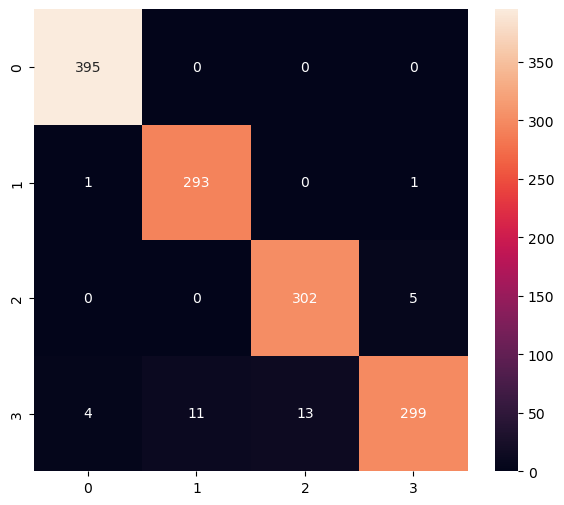

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.96      0.99      0.98       295
           2       0.96      0.98      0.97       307
           3       0.98      0.91      0.95       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\VIP\AppData\Local\Temp\tmpv9papxaz\assets


6432

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9384198  0.01795145 0.01375364 0.02987502]
0
